In [1]:
from Models.Seq2seq import trainer_seq2seq

mytrainer = trainer_seq2seq(learning_rate= 0.001)
mytrainer.load(name = 'seq2seq_MoreData_3_22')

model loaded from save\seq2seq_MoreData_3_22.pt


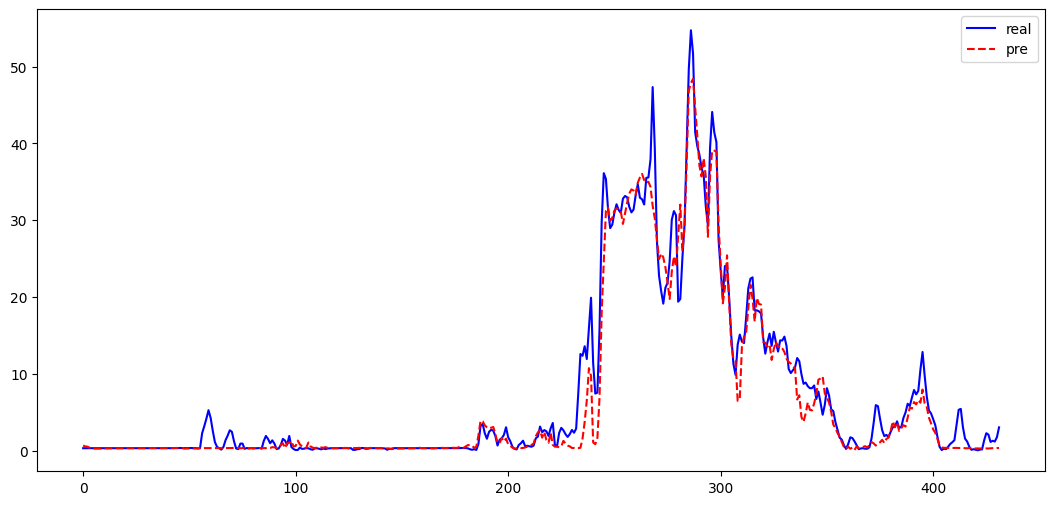

In [3]:
Y_target,Y_forcast = mytrainer.show(index_begin= 200,index_end= 600)

In [6]:
import numpy as np

Y_target,Y_forcast = np.array(Y_target),np.array(Y_forcast)

error = Y_forcast - Y_target

In [7]:
error.shape

(432,)

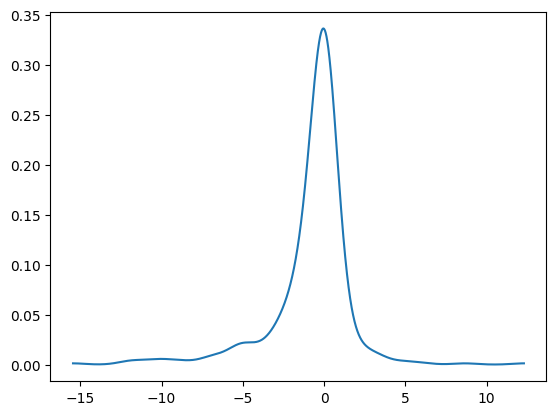

In [8]:
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

kde = gaussian_kde(error,bw_method = 'scott')
# 生成用于评估的数据点
x = np.linspace(min(error), max(error), 10000)
# 计算并绘制 KDE
plt.plot(x, kde.evaluate(x))
plt.show()

In [29]:
get_bound(error,confidence= 0.7) 就先使用这个

(-2.3704931899468855, 0.8720793337430751)

In [27]:
def get_bound(data,confidence = 0.5):
    # 计算 KDE
    if(confidence >=1 or confidence <=0):
        raise ValueError('confidence should between 0 and 1')
    kde = gaussian_kde(data)
    # 从 KDE 生成新的样本
    num_samples = 10000
    samples = kde.resample(num_samples)
    # 计算 25% 和 75% 分位数
    lower_bound = np.percentile(samples, 50 - confidence*100 / 2)
    upper_bound = np.percentile(samples, 50 + confidence*100 / 2)

    return lower_bound,upper_bound